In [2]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

import csv

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [3]:
file_path_ny_16 = "/home/jlab/18282_elapsed_time.txt"
file_path_nn_16 = "/home/jlab/18280_elapsed_time.txt"
file_path_yn_16 = "/home/jlab/18283_elapsed_time.txt"

file_path_ny_32 = "/home/jlab/18286_elapsed_time.txt"
file_path_nn_32 = "/home/jlab/18285_elapsed_time.txt"
file_path_yn_32 = "/home/jlab/18284_elapsed_time.txt"

file_path_ny_64 = "/home/jlab/18287_elapsed_time.txt"
file_path_nn_64 = "/home/jlab/18288_elapsed_time.txt"
file_path_yn_64 = "/home/jlab/18289_elapsed_time.txt"

file_path_ny_90 = "/home/jlab/18293_elapsed_time.txt"
file_path_nn_90 = "/home/jlab/18291_elapsed_time.txt"
file_path_yn_90 = "/home/jlab/18290_elapsed_time.txt"

file_path_ny_140 = "/home/jlab/18294_elapsed_time.txt"
file_path_nn_140 = "/home/jlab/18295_elapsed_time.txt"
file_path_yn_140 = "/home/jlab/18296_elapsed_time.txt"

file_path_ny_190 = "/home/jlab/18302_elapsed_time.txt"
file_path_nn_190 = "/home/jlab/18300_elapsed_time.txt"
file_path_yn_190 = "/home/jlab/18301_elapsed_time.txt"

file_path_ny_260 = "/home/jlab/18303_elapsed_time.txt"
file_path_nn_260 = "/home/jlab/18304_elapsed_time.txt"
file_path_yn_260 = "/home/jlab/18305_elapsed_time.txt"

nn_vec = [file_path_nn_16,file_path_nn_32,file_path_nn_64,file_path_nn_90,file_path_nn_140,file_path_nn_190,file_path_nn_260]
ny_vec = [file_path_ny_16,file_path_ny_32,file_path_ny_64,file_path_ny_90,file_path_ny_140,file_path_ny_190,file_path_ny_260]
yn_vec = [file_path_yn_16,file_path_yn_32,file_path_yn_64,file_path_yn_90,file_path_yn_140,file_path_yn_190,file_path_yn_260]
postsamp_vec = [16, 32, 64, 90, 140, 190, 260]

In [4]:
posttext = " with 260 Postsamples and 60 Q method Decimation."

df = pandas.read_csv(file_path_ny_260, header=None,delimiter=' ')  #n,y
df2 = pandas.read_csv(file_path_nn_260, header=None,delimiter=' ') #n,n
df3 = pandas.read_csv(file_path_yn_260, header=None,delimiter=' ') #y,n

In [5]:
print("n,y.")
df.describe()

n,y.


,0,7
count,0.0,3688.000000
mean,NaN,24.013331
std,NaN,0.544327
min,NaN,22.350719
25%,NaN,23.647943
50%,NaN,24.016752
75%,NaN,24.369144
max,NaN,32.712734


In [6]:
print("n,n.")
df2.describe()

n,n.


,0,7
count,0.0,3296.000000
mean,NaN,17.459429
std,NaN,0.328274
min,NaN,17.043200
25%,NaN,17.365177
50%,NaN,17.449008
75%,NaN,17.535961
max,NaN,34.116673


In [7]:
print("y,n.")
df3.describe()

y,n.


,0,7
count,0.0,3360.000000
mean,NaN,10.537948
std,NaN,0.139196
min,NaN,10.199744
25%,NaN,10.443992
50%,NaN,10.519232
75%,NaN,10.609024
max,NaN,11.502816


In [8]:
print(df.keys())
print(df.head())
print(df2.head())
print(df3.head())

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
    0    1     2       3      4        5     6          7   8
0 NaN  :::  CUDA  kernel  total  elapsed  time  24.505152  ms
1 NaN  :::  CUDA  kernel  total  elapsed  time  24.809153  ms
2 NaN  :::  CUDA  kernel  total  elapsed  time  23.999392  ms
3 NaN  :::  CUDA  kernel  total  elapsed  time  23.714624  ms
4 NaN  :::  CUDA  kernel  total  elapsed  time  23.208927  ms
    0    1     2       3      4        5     6          7   8
0 NaN  :::  CUDA  kernel  total  elapsed  time  18.005505  ms
1 NaN  :::  CUDA  kernel  total  elapsed  time  17.513569  ms
2 NaN  :::  CUDA  kernel  total  elapsed  time  17.409121  ms
3 NaN  :::  CUDA  kernel  total  elapsed  time  17.383615  ms
4 NaN  :::  CUDA  kernel  total  elapsed  time  17.523359  ms
    0    1     2       3      4        5     6          7   8
0 NaN  :::  CUDA  kernel  total  elapsed  time  11.387840  ms
1 NaN  :::  CUDA  kernel  total  elapsed  time  10.637536  ms
2 NaN  :::  CUD

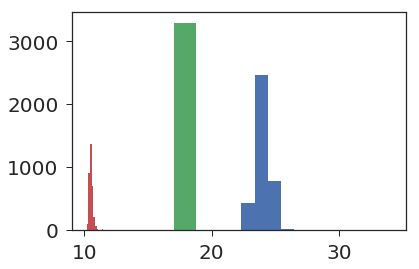

In [9]:
plt.hist(df[7],label="n,y")
plt.hist(df2[7],label="n,n")
plt.hist(df3[7],label="y,n")
plt.show()

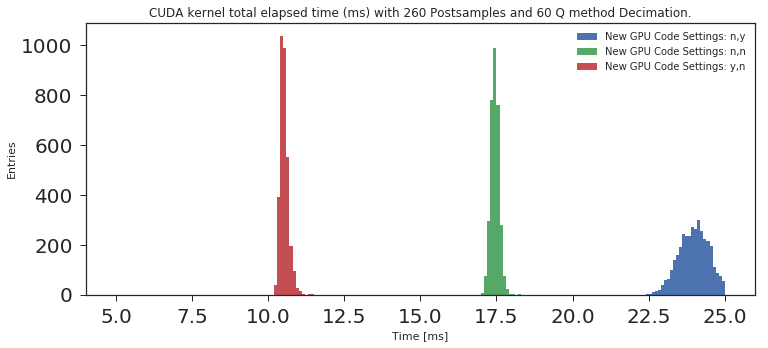

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.hist(df[7],bins=200,range=(5,25),label="New GPU Code Settings: n,y")
plt.hist(df2[7],bins=200,range=(5,25),label="New GPU Code Settings: n,n")
plt.hist(df3[7],bins=200,range=(5,25),label="New GPU Code Settings: y,n")
plt.xlabel("Time [ms]")
plt.ylabel("Entries")
plt.title("CUDA kernel total elapsed time (ms)"+posttext)
plt.legend()
plt.show()

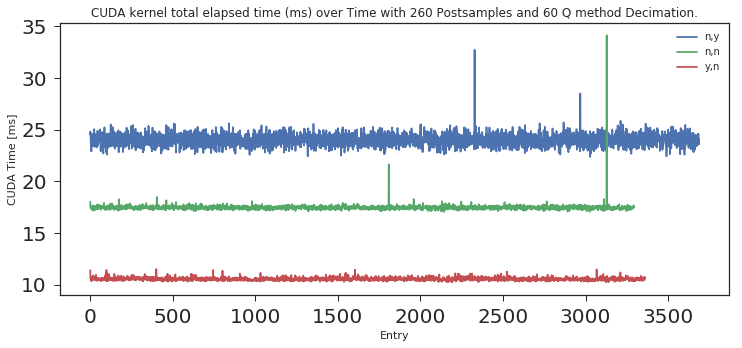

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(df[7],label="n,y")
plt.plot(df2[7],label="n,n")
plt.plot(df3[7],label="y,n")
plt.ylabel("CUDA Time [ms]")
plt.xlabel("Entry")
plt.title("CUDA kernel total elapsed time (ms) over Time"+posttext)
plt.legend()
plt.show()

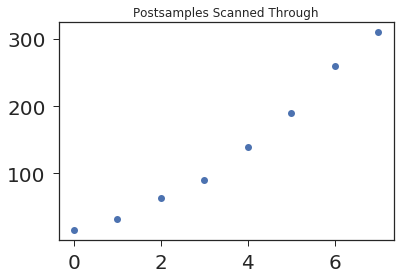

In [12]:
plt.plot([16, 32, 64, 90, 140, 190, 260, 310],'bo')
plt.title("Postsamples Scanned Through")
plt.show()

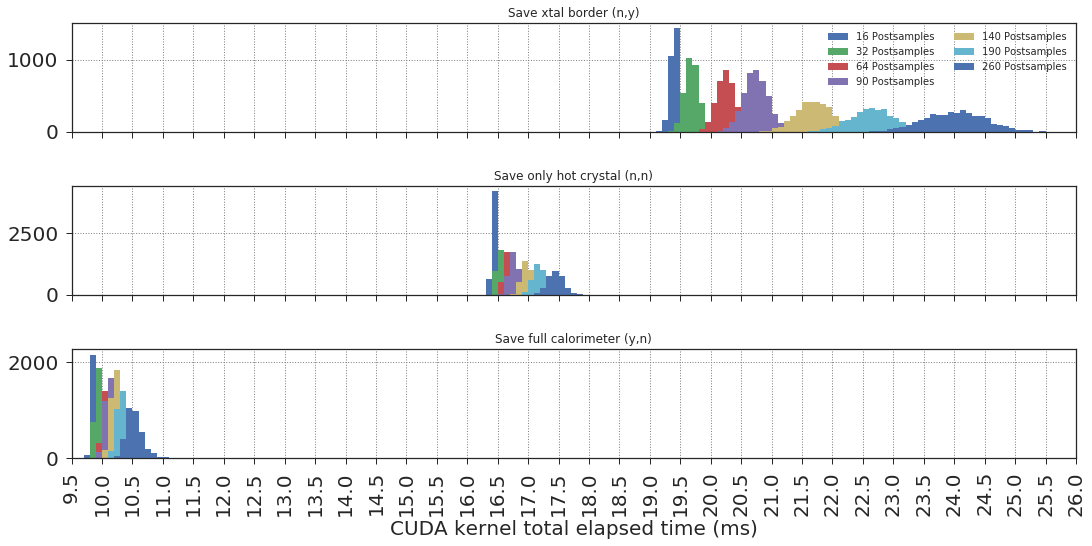

In [17]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18, 8),sharex = True, sharey=False)
plt.xlabel("CUDA kernel total elapsed time (ms)", fontsize=20)
fig.subplots_adjust(hspace=.5)

ax[0].set_title("Save xtal border (n,y)") #n,y
ax[1].set_title("Save only hot crystal (n,n)") #n,n
ax[2].set_title("Save full calorimeter (y,n)") #y,n

for i in range(len(ax)):
    ax[i].grid(color='grey', linestyle='dotted', linewidth=1)
#    ax[i].color_cycle

for i in range(len(nn_vec)):
    df = pandas.read_csv(ny_vec[i], header=None,delimiter=' ') #n,y
    df2 = pandas.read_csv(nn_vec[i], header=None,delimiter=' ') #n,n
    df3 = pandas.read_csv(yn_vec[i], header=None,delimiter=' ') #y,n
    ax[0].hist(df[7],bins=300,range=(5,35), label = str(postsamp_vec[i])+" Postsamples" )
    ax[1].hist(df2[7],bins=200,range=(5,25),label='')
    ax[2].hist(df3[7],bins=200,range=(5,25),label='')
    
    
plt.xticks(np.arange(0, 30, step=0.5),rotation=90)
plt.xlim(9.5,26)
legend = ax[0].legend(ncol=2)
plt.show()

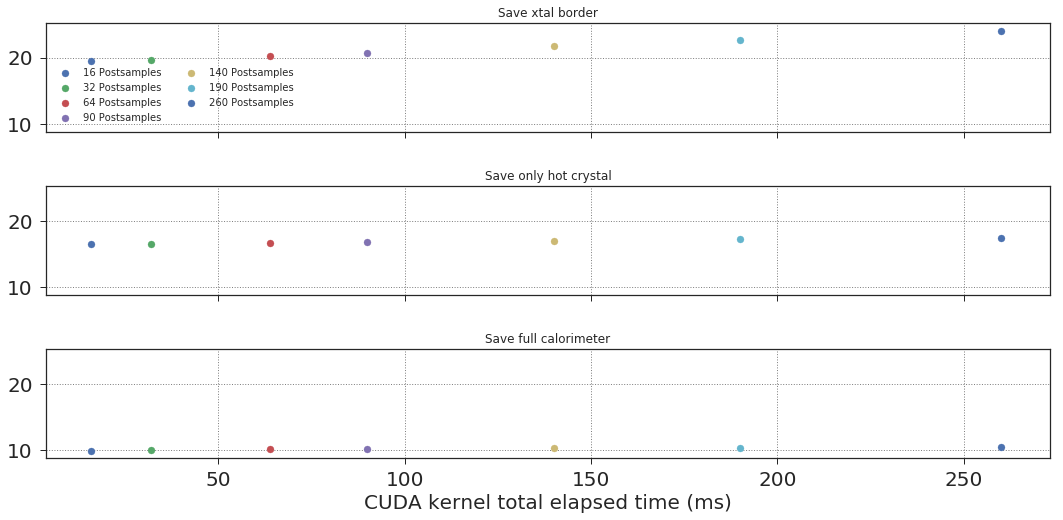

In [14]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18, 8),sharex = True, sharey=True)

plt.xlabel("CUDA kernel total elapsed time (ms)", fontsize=20)
fig.subplots_adjust(hspace=.5)

ax[0].set_title("Save xtal border") #n,y
ax[1].set_title("Save only hot crystal") #n,n
ax[2].set_title("Save full calorimeter") #y,n

for i in range(len(ax)):
    ax[i].grid(color='grey', linestyle='dotted', linewidth=1)
#    ax[i].color_cycle

mean_vec_nn = []
mean_vec_yn = []
mean_vec_ny = []

std_vec_nn = []
std_vec_yn = []
std_vec_ny = []

for i in range(len(nn_vec)):
    df = pandas.read_csv(ny_vec[i], header=None,delimiter=' ') #n,y
    df2 = pandas.read_csv(nn_vec[i], header=None,delimiter=' ') #n,n
    df3 = pandas.read_csv(yn_vec[i], header=None,delimiter=' ') #y,n
    
    ax[0].scatter(x = postsamp_vec[i], y=np.mean(df[7]), label = str(postsamp_vec[i])+" Postsamples" )
    ax[1].scatter(x = postsamp_vec[i], y=np.mean(df2[7]), label = str(postsamp_vec[i])+" Postsamples" )
    ax[2].scatter(x = postsamp_vec[i], y=np.mean(df3[7]), label = str(postsamp_vec[i])+" Postsamples" )

    mean_vec_ny.append(np.mean(df[7]))
    mean_vec_nn.append(np.mean(df2[7]))
    mean_vec_yn.append(np.mean(df3[7]))
    
    std_vec_ny.append(np.std(df[7]))
    std_vec_nn.append(np.std(df2[7]))
    std_vec_yn.append(np.std(df3[7]))

legend = ax[0].legend(ncol=2)
plt.show()


****************************************
Minimizer is Linear
Chi2                      =    0.0111882
NDf                       =            5
p0                        =      16.4095   +/-   0.0962201   
p1                        =   0.00407997   +/-   0.00082922  

****************************************
Minimizer is Linear
Chi2                      =     0.226014
NDf                       =            5
p0                        =      19.1141   +/-   0.0836612   
p1                        =    0.0184171   +/-   0.00139352  

****************************************
Minimizer is Linear
Chi2                      =     0.432605
NDf                       =            5
p0                        =      9.90235   +/-   0.0731532   
p1                        =   0.00250303   +/-   0.000618562 


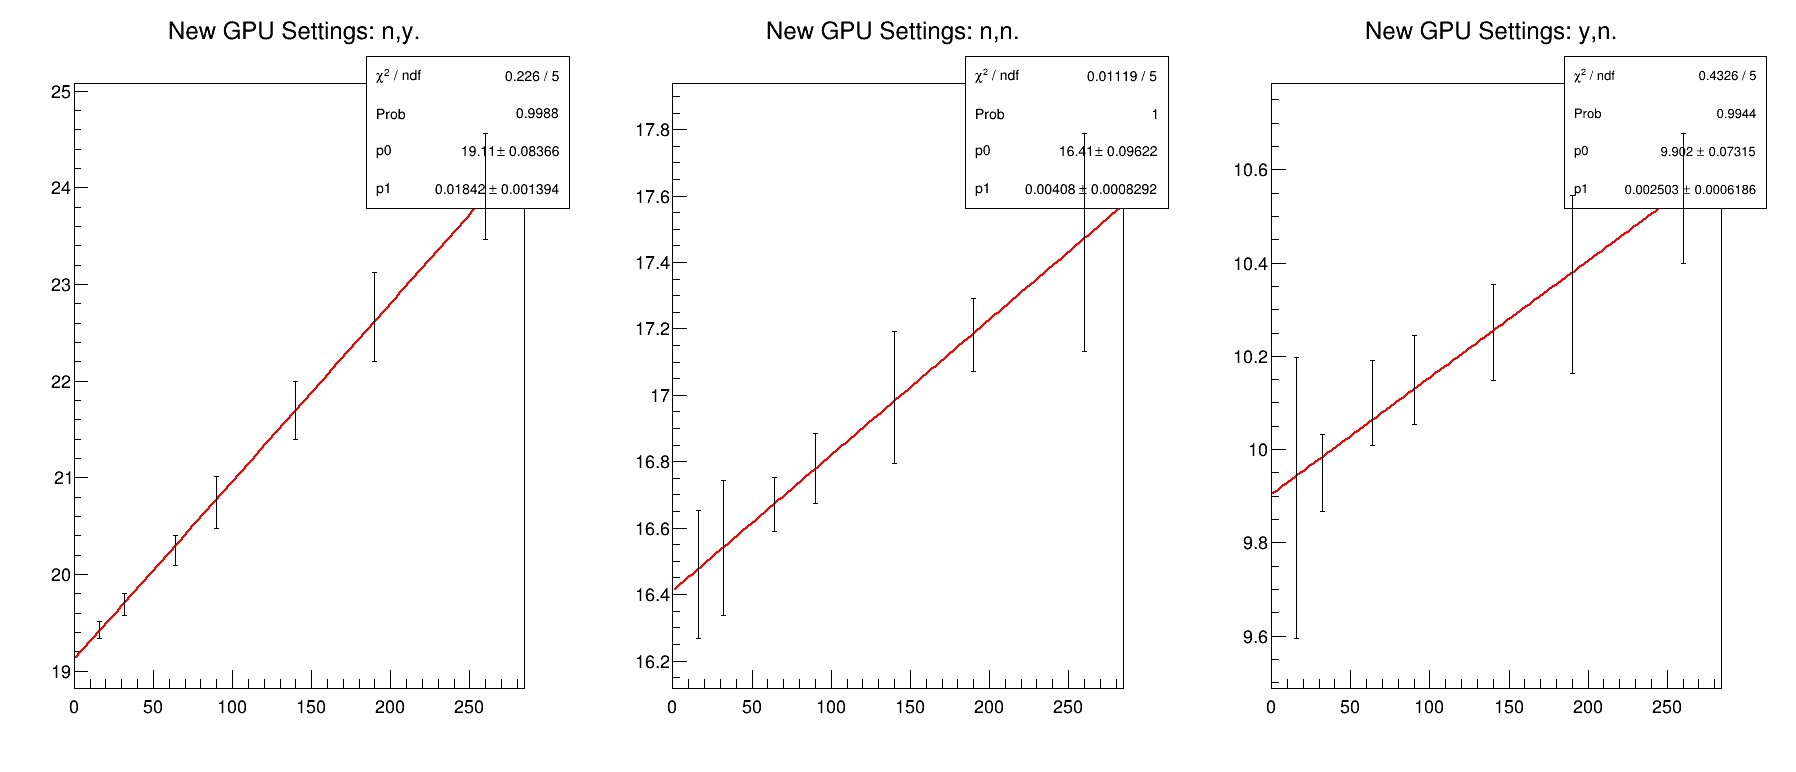

In [15]:
gr = r.TGraphErrors(len(mean_vec_nn))
for i, mean in enumerate(mean_vec_nn):
    gr.SetPoint(i,postsamp_vec[i],mean)
    gr.SetPointError(i,0,std_vec_nn[i])
    
c = r.TCanvas("c","c",1800,800)
c.Divide(3,1)
c.cd(2)
gr.SetTitle("New GPU Settings: n,n.")
gr.Draw("ap")
gr.Fit("pol1")
c.Draw()

c.cd(1)
gr2 = r.TGraphErrors(len(mean_vec_ny))
for i, mean in enumerate(mean_vec_ny):
    gr2.SetPoint(i,postsamp_vec[i],mean)
    gr2.SetPointError(i,0,std_vec_ny[i])
    
gr2.SetTitle("New GPU Settings: n,y.")
gr2.Draw("ap")
gr2.Fit("pol1")

c.cd(3)
gr3 = r.TGraphErrors(len(mean_vec_yn))
for i, mean in enumerate(mean_vec_yn):
    gr3.SetPoint(i,postsamp_vec[i],mean)
    gr3.SetPointError(i,0,std_vec_yn[i])
    
gr3.SetTitle("New GPU Settings: y,n.")
gr3.Draw("ap")
gr3.Fit("pol1")

c.Draw()

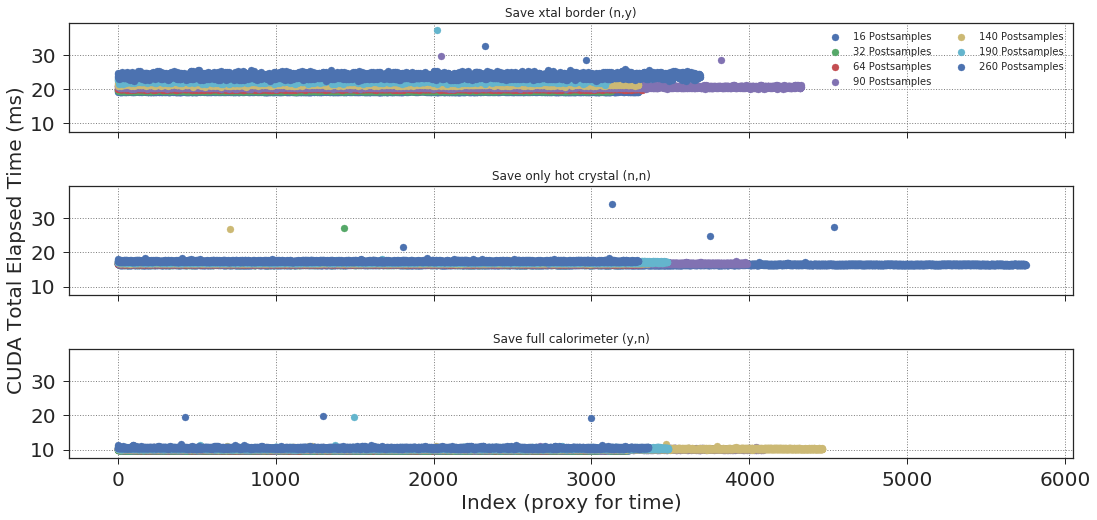

In [16]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18, 8),sharex = True, sharey=True)
plt.xlabel("Index (proxy for time)", fontsize=20)
ax[1].set_ylabel("CUDA Total Elapsed Time (ms)",fontsize=20)
fig.subplots_adjust(hspace=.5)

ax[0].set_title("Save xtal border (n,y)") #n,y
ax[1].set_title("Save only hot crystal (n,n)") #n,n
ax[2].set_title("Save full calorimeter (y,n)") #y,n

for i in range(len(ax)):
    ax[i].grid(color='grey', linestyle='dotted', linewidth=1)
#    ax[i].color_cycle

for i in range(len(nn_vec)):
    df = pandas.read_csv(ny_vec[i], header=None,delimiter=' ') #n,y
    df2 = pandas.read_csv(nn_vec[i], header=None,delimiter=' ') #n,n
    df3 = pandas.read_csv(yn_vec[i], header=None,delimiter=' ') #y,n
    ax[0].scatter(df[7].index,df[7], label = str(postsamp_vec[i])+" Postsamples" )
    ax[1].scatter(df2[7].index,df2[7], label = '')
    ax[2].scatter(df3[7].index,df3[7], label = '')
    
legend = ax[0].legend(ncol=2)
plt.show()